# Data Augmentation & Visualization

In [ ]:
import matplotlib.pyplot as plt  # For displaying images
import torchvision.transforms as transforms # Handles Resizing and Augmentation
from torchvision.datasets import ImageFolder # 
from torch.utils.data import DataLoader
import numpy as np


In [21]:
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [ ]:
dataset = ImageFolder("../dataset", transform=train_transform)
loader = DataLoader(dataset, batch_size=8, shuffle=True)




In [23]:
def unnormalize(img):
    img = img * 0.5 + 0.5  # Reverse the Normalize transform
    return img.numpy().transpose(1, 2, 0)  # Convert from CHW → HWC


In [24]:
dataiter = iter(loader)
images, labels = next(dataiter)


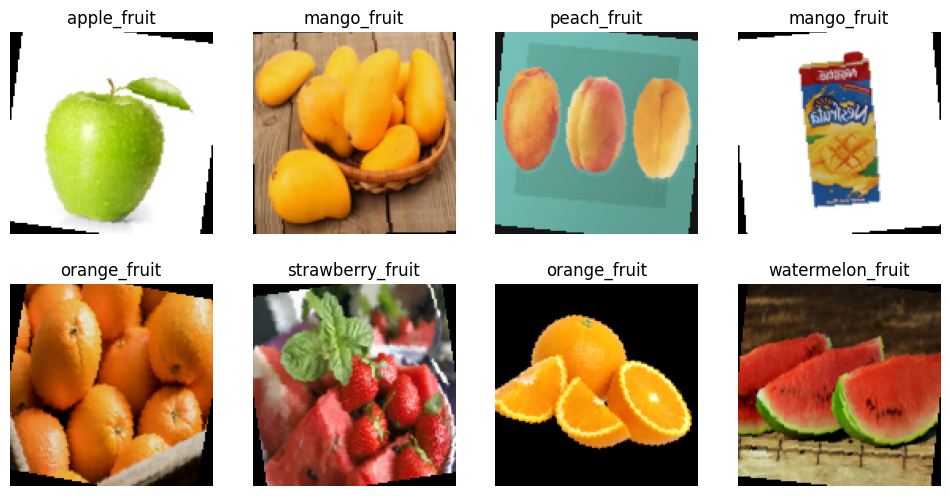

In [25]:
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(unnormalize(images[i]))
    plt.title(dataset.classes[labels[i]])
    plt.axis('off')


In [27]:
# plt.suptitle("🔁 Augmented Training Images", fontsize=16)
# plt.tight_layout()
# plt.show()
print(images.shape)  # Should be [batch_size, 3, H, W]
print(labels)



torch.Size([8, 3, 128, 128])
tensor([0, 4, 6, 4, 5, 8, 5, 9])
